# Prediction Model

A Final Task of Project Based Internship at ID/X Partner by Rakamin Academy.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv', low_memory=False)
df.sample(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
216048,216048,1306564,1551739,24000,24000,23625.0,36 months,7.90,750.97,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276191,276191,31557384,34150567,20000,20000,20000.0,60 months,11.67,441.57,B,...,NaN,NaN,NaN,NaN,NaN,NaN,16400.0,NaN,NaN,NaN
337751,337751,22262893,24585670,16000,16000,16000.0,36 months,10.99,523.75,B,...,NaN,NaN,NaN,NaN,NaN,NaN,45800.0,NaN,NaN,NaN
235640,235640,36540389,39283127,15000,15000,15000.0,60 months,12.99,341.22,C,...,NaN,NaN,NaN,NaN,NaN,NaN,27300.0,NaN,NaN,NaN
195131,195131,1551133,1817266,35000,35000,35000.0,60 months,23.83,1003.43,F,...,NaN,NaN,NaN,NaN,NaN,NaN,33200.0,NaN,NaN,NaN


# Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
df.shape

(466285, 75)

In [5]:
# Check duplicated data

df.duplicated().sum()

0

**After understanding the data, it was found that:**

- The dataset has 466285 rows and 75 columns
- There are several columns that have missing values
- `issue_d`, `earliest_cr_line`, `last_pymnt_d`, `next_pymnt_d`, and `last_credit_pull_d`, will be converted into datetime
- No duplicate data

# Exploratory Data Analysis (EDA)

In [6]:
# Divide data by categorical and numeric columns

cat = df.select_dtypes(include = ['object'])
num = df.select_dtypes(exclude = ['object'])

In [7]:
# Descriptive statistics - Numerical

num_desc = num.describe().T
num_desc['unique'] = num.nunique()
num_desc

,count,mean,std,min,25%,50%,75%,max,unique
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05,466285
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07,466285
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07,466285
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04,1352
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04,1354
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04,9854
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01,506
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03,55622
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06,31901
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01,3997


In [8]:
# Descriptive statistics - Categorical

cat.describe().T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


Observation from both numerical and categorical descriptive statistics:
- Unnecessary features such as features that have only one or equal to the number of rows unique values will be removed
- Features that have high cardinality such as `emp_title`, `title`, `desc` features will be removed as well as `zip_code`

In [9]:
# Drop unnecessary features

df.drop(columns = ['Unnamed: 0', 'id', 'member_id', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint',
                   'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 
                   'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'emp_title', 
                   'url', 'desc', 'title', 'zip_code', 'application_type'], inplace = True)

## Target Variable

In [10]:
# Check value of Loan Status

df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

**To predict credit risk, `loan_status` column will be divided into two category:**

Bad Loan : 
- Default 
- Charged Off
- Late (31-120 days)
- Late (16-30 days)
- Does not meet the credit policy. Status:Charged Off

Good Loan : 
- Fully Paid
- Current
- In Grace Period
- Does not meet the credit policy. Status: Fully Paid

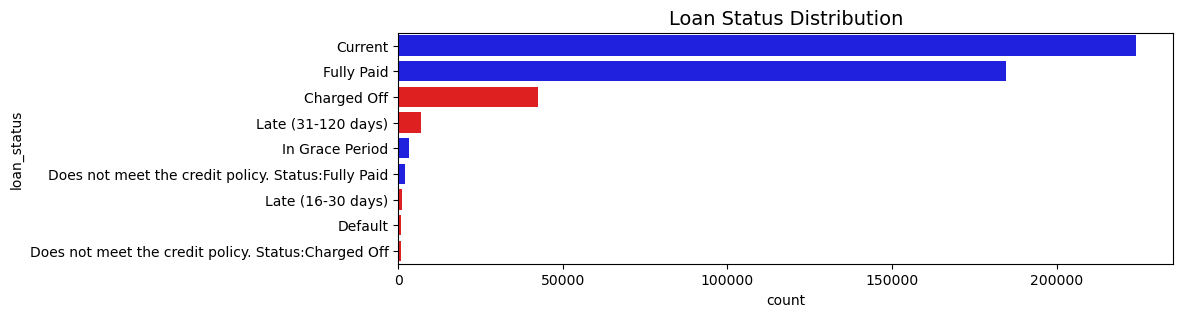

In [11]:
# Visualization of loan_status distribution
loan_stat = df['loan_status'].value_counts().sort_values(ascending=False).index

colors = ['blue' if status in ['Fully Paid', 'Current', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid']
                            else "red" for status in loan_stat]

plt.figure(figsize=(10, 3))

# Loan Status Distribution
sns.countplot(data=df, y="loan_status", order=loan_stat, palette=colors)
plt.title("Loan Status Distribution", fontsize=14)

plt.show()

In [12]:
# Create target variable
df['loan_approved'] = df['loan_status'].isin(['Fully Paid', 'Current', 'In Grace Period', 
                                              'Does not meet the credit policy. Status:Fully Paid']).astype(int)

# Drop the column loan_status
df.drop(columns = 'loan_status', inplace = True)

# Show the number of labels 
df['loan_approved'].value_counts()

1    414099
0     52186
Name: loan_approved, dtype: int64

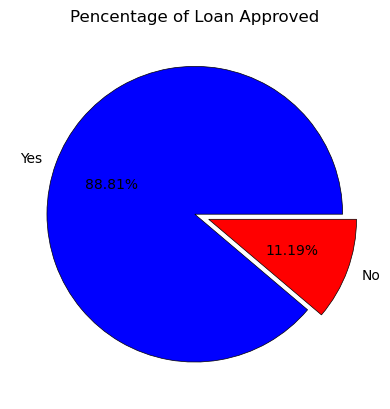

In [13]:
# Visualization using pie chart
plt.pie(x = df['loan_approved'].value_counts(), labels = ['Yes', 'No'], autopct = '%.2f%%', colors = ['#0000FF', '#FF0000'], 
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}, explode = [0, 0.1])
plt.title('Pencentage of Loan Approved', fontsize = 12)
plt.show()

## Univariate Analysis

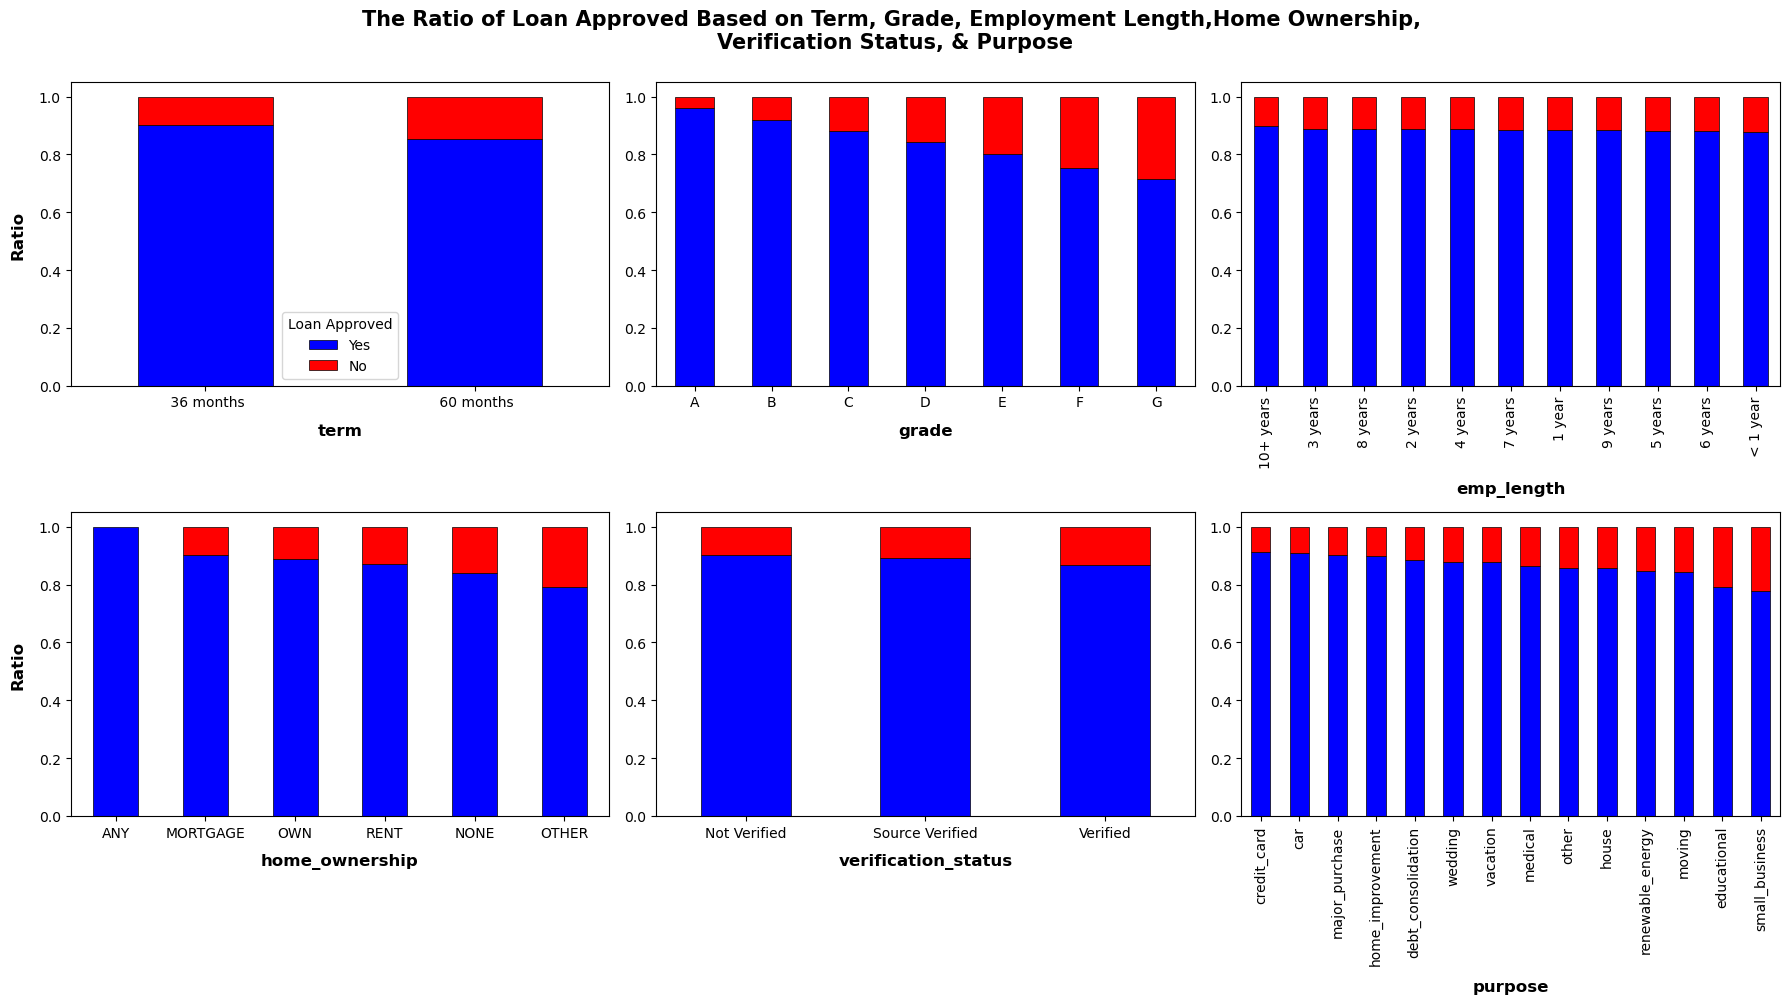

In [14]:
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

cat_col = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose']

# Calculate the proportion of loan_approved for the cat_columns list
for i, cat_column in enumerate(cat_col):
    df_cat = df.groupby([cat_column])['loan_approved'].value_counts(normalize=True).unstack()
    df_cat = df_cat.rename(columns={0: 'No', 1: 'Yes'})
    df_cat = df_cat[['Yes', 'No']]
    df_cat = df_cat.sort_values('Yes', ascending=False)

    # Create a barchart
    ax1 = df_cat.plot.bar(stacked=True, color=['#0000FF', '#FF0000'], edgecolor='black', linewidth=0.5, ax=ax[i // 3, i % 3])

    if i not in [2, 5]:
        ax1.set_xticklabels(df_cat.index, rotation=0)

    ax1.set_xlabel(cat_column, fontsize=12, fontweight='bold', labelpad=10)

    if i in [0, 3]:
        ax1.set_ylabel('Ratio', fontsize=12, fontweight='bold', labelpad=10)
    else:
        ax1.set_ylabel('')

    # Add legend
    if i in [0]:
      ax1.legend(title='Loan Approved', loc='lower center')
    else:
      ax1.get_legend().remove()

plt.suptitle('The Ratio of Loan Approved Based on Term, Grade, Employment Length,Home Ownership, \nVerification Status, & Purpose', fontweight='bold', fontsize=15, y=1)
plt.tight_layout()
plt.show()

## Multivariate Analysis

<Axes: >

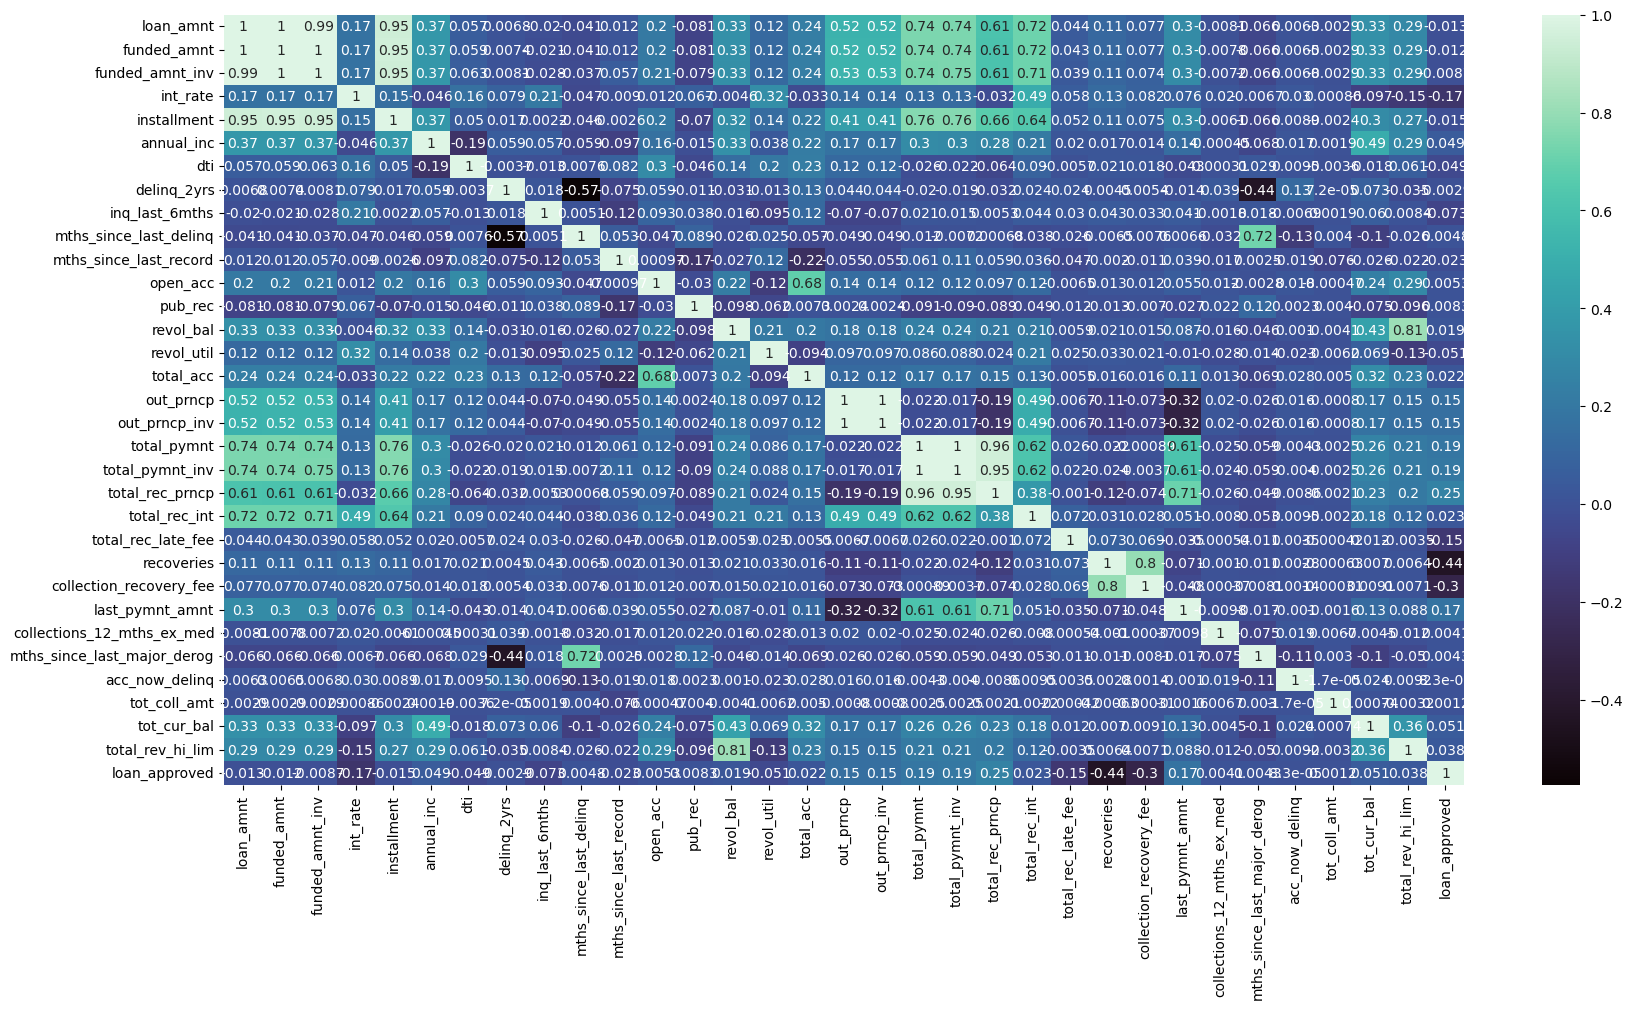

In [15]:
num = df.select_dtypes(exclude = ['object'])

df_corr = num.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(df_corr, cmap='mako', annot=True)

# Data Preparation

## Handle Missing Values

In [16]:
# Check the null values

null = pd.DataFrame(df.isnull().sum(), columns=['Total Null Data']).reset_index()
null[null['Total Null Data'] != 0]

,index,Total Null Data
8,emp_length,21008
10,annual_inc,4
17,delinq_2yrs,29
18,earliest_cr_line,29
19,inq_last_6mths,29
20,mths_since_last_delinq,250351
21,mths_since_last_record,403647
22,open_acc,29
23,pub_rec,29
25,revol_util,340


To handle missing values, there will be some actions that need to be done:

- Remove some features that have too many missing values such as `mths_since_last_delinq`, `mths_since_last_record`, `next_pymnt_d`, `mths_since_last_major_derog`, `tot_coll_amt`, `tot_cur_bal`, `total_rev_hi_lim`
- For `emp_length` will be impute the null values with < 1 year assumed they employment experience is less than one year
- Features with null values that will be impute with mode is `earliest_cr_line`, `last_pymnt_d`, and `last_credit_pull_d`
- Features with null values that will be impute with mean is `revol_util`
- And last, features with null values that will be impute with median is `annual_inc`, `delinq_2yrs`, `inq_last_6mths`, `open_acc`, `pub_rec`, `total_ac`, `collections_12_mths_ex_med`, and `acc_now_delinq`

In [17]:
# Remove unnecessary columns
df.drop(columns = ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 
                   'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'], inplace = True)

In [18]:
# Imputation emp_lenght with < 1 year value
df['emp_length'].fillna('< 1 year', inplace = True)

# Impute values with mode
df['earliest_cr_line'].fillna(df['earliest_cr_line'].mode()[0], inplace = True)
df['last_pymnt_d'].fillna(df['last_pymnt_d'].mode()[0], inplace = True)
df['last_credit_pull_d'].fillna(df['last_credit_pull_d'].mode()[0], inplace = True)

# Impute values with mean
df['revol_util'].fillna(df['revol_util'].mean(), inplace = True)

# Imputation with median
df['annual_inc'].fillna(df['annual_inc'].median(), inplace = True)
df['delinq_2yrs'].fillna(df['delinq_2yrs'].median(), inplace = True)
df['inq_last_6mths'].fillna(df['inq_last_6mths'].median(), inplace = True)
df['open_acc'].fillna(df['open_acc'].median(), inplace = True)
df['pub_rec'].fillna(df['pub_rec'].median(), inplace = True)
df['total_acc'].fillna(df['total_acc'].median(), inplace = True)
df['collections_12_mths_ex_med'].fillna(df['collections_12_mths_ex_med'].median(), inplace = True)
df['acc_now_delinq'].fillna(df['acc_now_delinq'].median(), inplace = True)

In [19]:
# Show missing values

df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_re

**All features that have missing values have been handled.**

## Feature Engineering

From understanding data above features `issue_d`, `earliest_cr_line`, `last_pymnt_d` and `last_credit_pull_d` will be converted into datetime.

In [20]:
# Convert dtype to datetime

df['issue_d'] = pd.to_datetime(df['issue_d'], format = '%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format = '%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format = '%b-%y')

In [21]:
# Create loan duration column
df['loan_duration'] = (df['last_pymnt_d'] - df['issue_d']).dt.days

# Create credit report age column
df['credit_report_age'] = (df['last_credit_pull_d'] - df['issue_d']).dt.days

# Create credit history length column
df['credit_hist_len'] = (df['issue_d'] - df['earliest_cr_line']).dt.days

After creating several new columns that can provide additional information for modeling, `issue_d`, `earliest_cr_line`, `last_pymnt_d` and `last_credit_pull_d` columns will be deleted.

In [22]:
# Remove the columns that are no longer be used

df.drop(columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'], inplace = True)

## Feature Encoding

In [23]:
df_en = df.copy()

In [24]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   sub_grade                   466285 non-null  object 
 8   emp_length                  466285 non-null  object 
 9   home_ownership              466285 non-null  object 
 10  annual_inc                  466285 non-null  float64
 11  verification_status         466285 non-null  object 
 12  pymnt_plan                  466285 non-null  object 
 13  purpose       

In [25]:
from sklearn.preprocessing import LabelEncoder

# Label encoding
df_en['term'] = LabelEncoder().fit_transform(df_en['term'])
df_en['grade'] = LabelEncoder().fit_transform(df_en['grade'])
df_en['sub_grade'] = LabelEncoder().fit_transform(df_en['sub_grade'])
df_en['pymnt_plan'] = LabelEncoder().fit_transform(df_en['pymnt_plan'])
df_en['initial_list_status'] = LabelEncoder().fit_transform(df_en['initial_list_status'])

In [26]:
df_en['emp_length'] = df_en['emp_length'].map({'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
                                             '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
                                             '8 years': 8, '9 years': 9, '10+ years': 10})

In [27]:
# One-hot encoding

for cat in ['home_ownership', 'verification_status', 'purpose', 'addr_state']:
  df_1 = pd.get_dummies(df_en[cat], prefix=cat)
  df_en  = df_en.drop(cat, axis = 1)
  df_en  = df_en.join(df_1)

In [28]:
df_en.sample(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
261438,23800,23800,23800.0,1,17.14,593.29,3,18,2,80000.0,...,0,0,0,0,0,0,0,0,0,0
305234,10950,10950,10950.0,0,14.99,379.54,2,14,0,100000.0,...,0,0,0,0,0,0,0,0,0,0
38908,3000,3000,3000.0,0,9.76,96.47,1,6,2,48000.0,...,0,0,0,0,0,0,0,0,0,0
34697,6000,6000,6000.0,0,12.87,201.80,2,10,1,47000.0,...,0,0,0,0,0,0,0,0,0,0
146612,20000,20000,20000.0,0,8.90,635.07,0,4,5,70000.0,...,0,0,0,0,0,0,0,0,0,0


## Feature Selection

To do feature selection I will use mutual information score. Mutual information is a measure of the dependency between two variables, and in the context of machine learning, it can be used to determine how much information to gain about the target of a feature. Mutual information is very useful for feature selection because it can capture non-linear relationships between features and targets.

In [29]:
from sklearn.feature_selection import mutual_info_classif

In [30]:
# Divide feature and target
X = df_en.drop(columns = 'loan_approved')
y = df_en['loan_approved']

# Show mutual information score
mutual_info_scores = mutual_info_classif(X, y)

In [31]:
# Mutual information score dataframe

df_mis = pd.DataFrame({'Features': X.columns, 'MI Scores': mutual_info_scores})
df_mis.sort_values('MI Scores', ascending = False, ignore_index = True, inplace = True)
df_mis

,Features,MI Scores
0,recoveries,0.128264
1,total_rec_prncp,0.125625
2,collection_recovery_fee,0.121361
3,purpose_debt_consolidation,0.070941
4,home_ownership_MORTGAGE,0.066090
...,...,...
103,addr_state_MS,0.000000
104,addr_state_MO,0.000000
105,addr_state_ID,0.000000
106,addr_state_MI,0.000000


In [32]:
# Select the 30 best features

top_features = df_mis['Features'].iloc[:30].tolist()
data_corr = df_en[top_features]

In [41]:
data_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   recoveries                           466285 non-null  float64
 1   total_rec_prncp                      466285 non-null  float64
 2   collection_recovery_fee              466285 non-null  float64
 3   purpose_debt_consolidation           466285 non-null  uint8  
 4   home_ownership_MORTGAGE              466285 non-null  uint8  
 5   last_pymnt_amnt                      466285 non-null  float64
 6   total_pymnt                          466285 non-null  float64
 7   loan_duration                        466285 non-null  int64  
 8   total_pymnt_inv                      466285 non-null  float64
 9   home_ownership_RENT                  466285 non-null  uint8  
 10  out_prncp_inv                        466285 non-null  float64
 11  out_prncp    

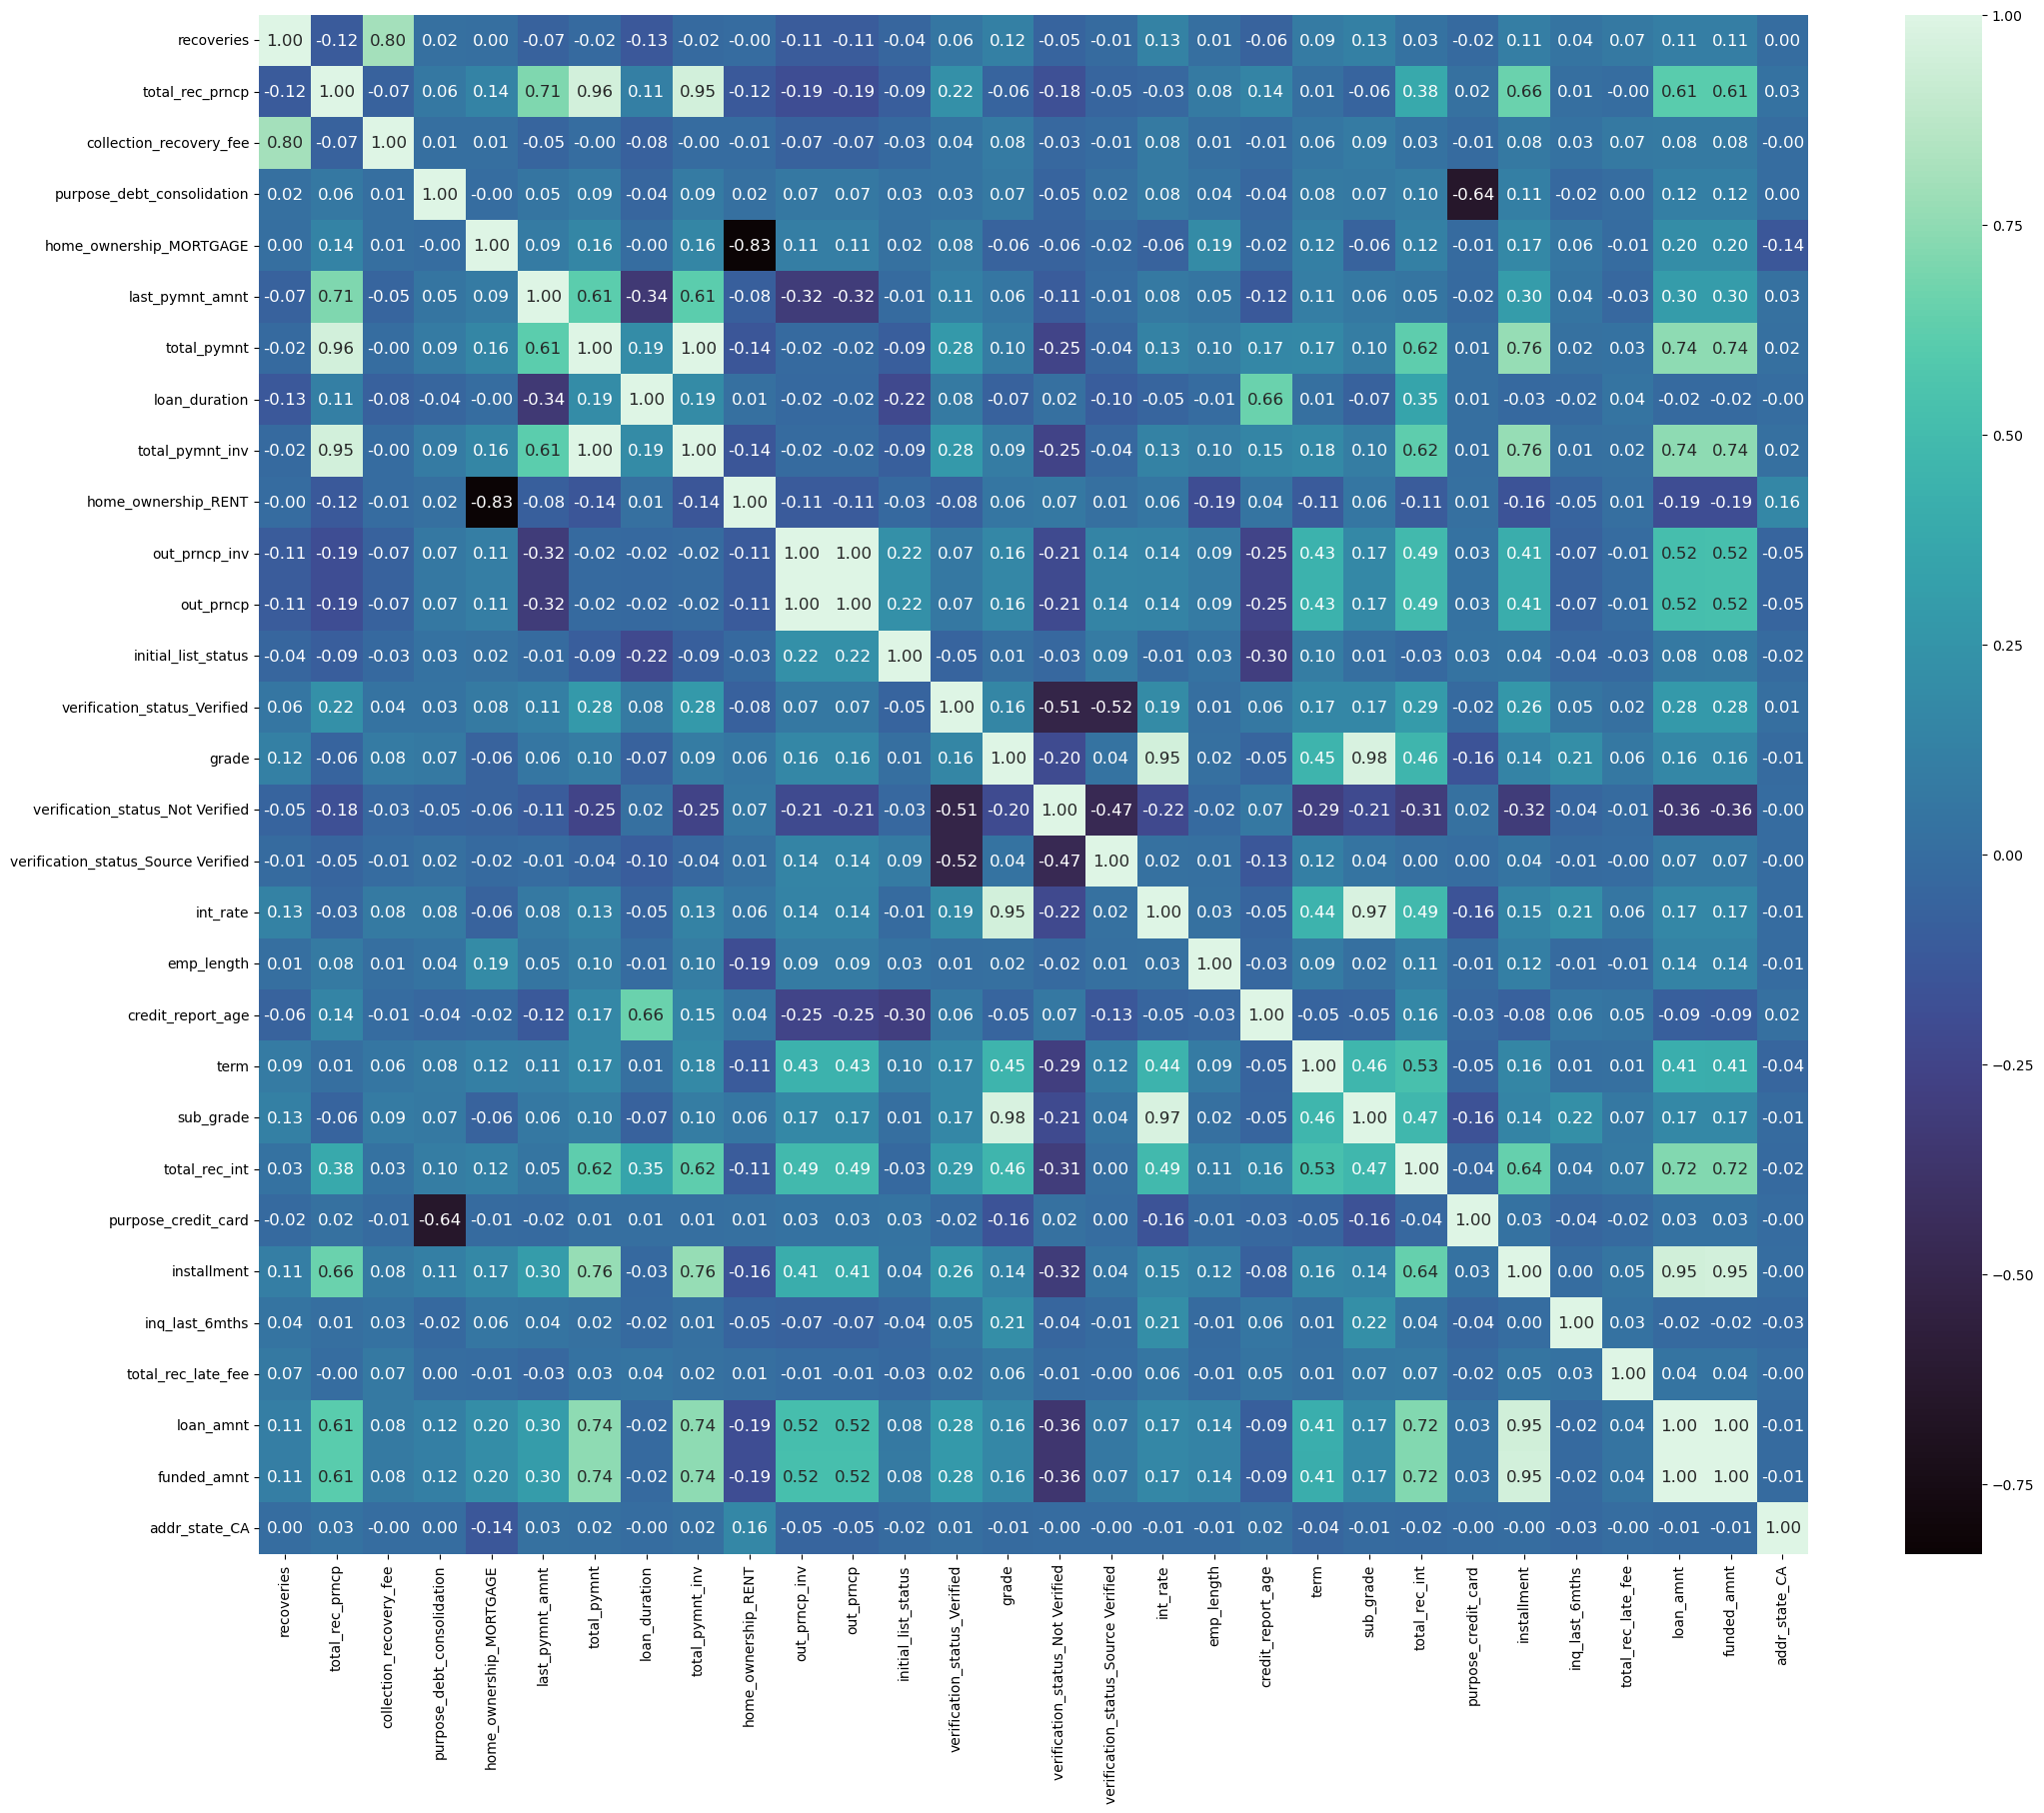

In [34]:
# Heatmap correlation 

plt.figure(figsize=(25, 20))
sns.heatmap(data_corr.corr(), cmap='mako', annot= True, fmt='.2f', annot_kws={'size': 12})
plt.show()

Use a heatmap to see features that have a high correlation and features with a low correlation so that the feature selection can be sorted again.

In [38]:
# Drop unnecessary columns

df_clean = data_corr.drop(columns = ['collection_recovery_fee', 'total_pymnt', 'total_pymnt_inv', 'last_pymnt_amnt',
                                'out_prncp_inv', 'int_rate', 'sub_grade', 'loan_amnt', 'funded_amnt', 'addr_state_CA'])

In [40]:
df_clean.head(5)

,recoveries,total_rec_prncp,purpose_debt_consolidation,home_ownership_MORTGAGE,loan_duration,home_ownership_RENT,out_prncp,initial_list_status,verification_status_Verified,grade,verification_status_Not Verified,verification_status_Source Verified,emp_length,credit_report_age,term,total_rec_int,purpose_credit_card,installment,inq_last_6mths,total_rec_late_fee
0,0.00,5000.00,0,0,1127,1,0.0,0,1,1,0,0,10,1492,0,861.07,1,162.87,1.0,0.00
1,117.08,456.46,0,0,487,1,0.0,0,0,2,0,1,0,640,1,435.17,0,59.83,5.0,0.00
2,0.00,2400.00,0,0,913,1,0.0,0,0,2,1,0,10,1492,0,603.65,0,84.33,2.0,0.00
3,0.00,10000.00,0,0,1127,1,0.0,0,0,2,0,1,10,1127,0,2209.33,0,339.31,1.0,16.97
4,0.00,2233.10,0,0,1492,1,766.9,0,0,1,0,1,1,1492,1,1009.07,0,67.79,0.0,0.00


## Split Data

In [43]:
# Split data to feature and target
X = df_clean
y = df_en['loan_approved']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Standardization

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

column_list = ['recoveries', 'total_rec_prncp', 'loan_duration', 'out_prncp', 'grade', 'emp_length', 
               'credit_report_age', 'total_rec_int', 'installment', 'inq_last_6mths', 'total_rec_late_fee']

for col in column_list:
    scaler.fit(X_train[[col]])
    X_train[col] = scaler.transform(X_train[[col]])
    X_test[col] = scaler.transform(X_test[[col]])

# Data Modeling

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import time

In [48]:
lr = LogisticRegression(random_state = 42)
dt = DecisionTreeClassifier(random_state = 42)
rf = RandomForestClassifier(random_state = 42)
gb = GradientBoostingClassifier(random_state = 42)

# Create the models list
models = [lr, dt, rf, gb]

In [49]:
result = []

for model in models:
    start = time.time()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train.values)
    y_pred = model.predict(X_test.values)
    
    accuracy_train = round(accuracy_score(y_train, y_pred_train), 5)
    accuracy_test = round(accuracy_score(y_test, y_pred), 5)
    
    precision_train = round(precision_score(y_train, y_pred_train), 5)
    precision_test = round(precision_score(y_test, y_pred), 5)
    
    recall_train = round(recall_score(y_train, y_pred_train), 5)
    recall_test = round(recall_score(y_test, y_pred), 5)
    
    roc_auc_train = round(roc_auc_score(y_train, y_pred_train), 5)
    roc_auc_test = round(roc_auc_score(y_test, y_pred), 5)
    end = time.time()
    
    result.append([accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, roc_auc_train, roc_auc_test, (end - start)])

The main goal in this project is to minimize errors in credit decisions, whether it is granting bad credit (which might lead to losses) or denying good credit (which might lead to lost business opportunities). 

Therefore I chose the recall evaluation metric. **Recalls are especially important in the context of credit risk** because companies want to capture as many high-risk customers (who may default) as possible. High recall means the model successfully identified the majority of at-risk customers. High recall ensures that customers at risk of default are not missed, reducing potential losses from undetected defaults.

In [52]:
# The result
df_models = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'GradientBoost']})
df_metrics = pd.DataFrame(data = result, columns = ['Acc (Train)', 'Acc (Test)', 'Prec (Train)', 'Prec (Test)', 'Recall (Train)', 'Recall (Test)', 'ROC AUC (Train)', 'ROC AUC (Test)', 'Time Elapsed'])
df_result = df_models.join(df_metrics)

df_result.sort_values('Recall (Test)', ascending = False, ignore_index = True, inplace = True)
df_result

,Model,Acc (Train),Acc (Test),Prec (Train),Prec (Test),Recall (Train),Recall (Test),ROC AUC (Train),ROC AUC (Test),Time Elapsed
0,GradientBoost,0.97977,0.97889,0.97808,0.97718,0.99963,0.99955,0.91066,0.90781,106.001657
1,Random Forest,0.99998,0.98403,0.99998,0.98288,1.00000,0.99941,0.99993,0.93110,90.837481
2,Logistic Regression,0.97429,0.97359,0.97370,0.97314,0.99801,0.99778,0.89175,0.89035,2.420598
3,Decision Tree,0.99999,0.98521,1.00000,0.99132,0.99999,0.99202,0.99999,0.96179,5.261723


From the recall values above, Gradient Boosting has the highest recall value on test data with a value of 0.99955, which means that this model captures almost all true positives in test data.

# Evaluation

Gradient Boosting is the best model based on recall metrics on test data. Although the differences are small compared to Random Forest, Gradient Boosting also shows more balanced performance and lower potential for overfitting. Therefore, Gradient Boosting not only provides the highest recall but also has good generalization, making it a more reliable choice for applications that are highly concerned about recall.